# DSCI GROUP PROJECT: (title)

## Introduction

The Department of Computer Science at UBC is researching player behavior on a Minecraft server they created. 
To maximize their user recruitment effort, they are interested in which player characteristics are most predictive of subscribing to a game-related newsletter. The data set collected includes player characteristics such as age, experience, hours played, and gender. This project will utilise K-nearest neighbours classification to predict whether a player will subscribe based on their age and the hours they spend playing. The K-nearest neighbours classifier predicts the label of a new observation by finding the K most similar observations to the new observation and using the majority class of the K most similar observations to predict the new class. K is representative of the number of nearest neighbours that will be used and is determined using cross-validation. 


**Table 1**:
| Variable Name  | Data Type                         | Meaning  |
|---------------|---------------------------------|----------|
| experience   | Character (text)               | Describes the player's ability at the game, categorized as: Pro, Veteran, Regular, Amateur, Beginner |
| subscribe    | Logical (TRUE or FALSE)        | Determines if the player is subscribed to the newsletter |
| hashedEmail  | Character (text)               | An email address that has been converted to a sequence of characters |
| played_hours | Double (number with decimals)  | The number of hours the individual spent playing on the server |
| name         | Character (text)               | The name of the player |
| gender       | Character (text)               | The gender of the player |
| Age          | Double (number with decimals)  | The age of the player |



## Question
**Broad Question**: “What player characteristics and behaviours are most predictive of 
subscribing to a game-related newsletter, and how do these features differ between various player types?”\
**Specific Question**:Can age and hours played predict whether a player will subscribe to a game-related newsletter?




`subscribe`: It has TRUE/FALSE statements. TRUE for those who subscribe the news settler:FALSE for those who do NOT subscribe the news letter.

## Describing the Data Set:

The Players data set includes census data collected from server users and the total hours each user played on the server. Hashed emails were used to identify the players and match their census data to the hours they spent playing on the server. 

The Players data set contained 7 variables and 196 observations. The variables measured included Experience, Subscribe, Hashed Email, Hours Played, Name, Gender, and Age. Reference Table 1 for each variable format. Experience was characterized as either beginner, amateur, regular, veteran, or pro. The subscribe column determined whether the player subscribed to the game-related newsletter. Hours played included the number of hours spent on the server; the values ranged from 0 to 223.1, with the average being 8.85. The players’ names were reported in the Name column. The players’ gender was recorded, including male, female, non-binary, two-spirited, agender, or prefer not to say. Finally, the Age of the players ranged from 8 to 50, with the average age of the server users being 20.5. 

As UBC computer science collected census data from the server, the players entered their responses for the Experience, Gender, and Age variables. This creates the possibility that players added incorrect data, decreasing the reliability of the dataset. For example, incorrectly assessing their experience level. Further, the data set currently includes many variables some of which, like the hashed email, may be unhelpful in predicting whether a player is subscribed. Finally, the Experience and Gender columns are both in character format, converting them to “as a factor” would make analysis easier. 


## Methods and Results: 

The players.csv data was loaded into the notebook, and the select function was used to create a data frame which contained only the subscribe, played_hours, and Age columns. The subscribe variable was changed from a logical format to “as a factor”, which is a compatible format for performing K-NN classification.

To begin the K-NN Classification, the players data set was split into a training set, which contained 75% of the data, and a testing set, which contained 25% of the data set. Stratified sampling was done to ensure that the proportion of the levels of the subscribe variable was maintained in both the testing and the training data. Next, the recipe was created. 

The recipe function describes that the played_hours and Age columns will be used to predict whether a user was subscribed. All predictors were scaled and centered using the step_scale and step_center functions to ensure that no variable has a greater influence on classification than the other. 

The model specifications were then created for the K-NN model. The nearest_neighbours function determines that the K-NN model will be used, setting the weight to rectangular ensures that each neighbour has equal weight in making the prediction. Setting the neighbours to tune demonstrates that we have not yet selected a set K value and instead will be performing analysis to determine the best value of K. The mode of the model was set to classification and the engine “kknn” is a package in R that applies K nearest neighbours.  

5-fold cross-validation was then performed on the training dataset to evaluate the model. The function vfold_cv splits the data into 5 different subsets and uses different subsets to train the model on one set and validate it on another. A tibble was then created called cross_k that lists potential K values from 1-50. This creates a grid of values to tune the model, allowing us to find the K value which gives the best performance. The workflow adds the recipe and model specifications described above and then uses 5-fold cross-validation to tune the model for the best K value. Once tuning has occurred the collect_metrics function collects the performance metrics of each value of K. The accuracy of the different K values was collected and a plot was created to describe the accuracy of the different K values the model used for the KNN classification.

The best K values were determined and added to the new model specification. Again, a rectangular weight function was used, and the engine was set to “kknn” with the mode set to “classification”. The workflow was created with the original recipe and new specifications. The model was fit to the players_csv data set. The model created was used to predict on the testing set, a tibble with the .pred_class column was created that contains the predicted class for subscribe as either TRUE or FALSE.

The accuracy metrics were collected by comparing the actual class labels from the test set to the predicted labels from the model. Then, a confusion Matrix was created to give a detailed breakdown of the prediction results, including true positives, true negatives, false positives, and false negatives. A graph was created which plots hours played against age, colouring the graph by whether a player was predicted to be subscribed or not.

The precision and recall metrics of the predictions were collected to be evaluated. 

The process was repeated with the other prospect K value. Further, the same classification techniques were used to create a classification model with age as the one predictor.




In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

### players.csv

**Table 2**

In [2]:
# load players.csv
players <- read_csv("https://raw.githubusercontent.com/svipond2/projectplanningindividual/refs/heads/main/players%20(2).csv")
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience subscribe
1 Pro         TRUE    
2 Veteran     TRUE    
3 Veteran    FALSE    
4 Amateur     TRUE    
5 Regular     TRUE    
6 Amateur     TRUE    
  hashedEmail                                                      played_hours
1 f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d 30.3        
2 f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9  3.8        
3 b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28  0.0        
4 23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5  0.7        
5 7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e  0.1        
6 f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977  0.0        
  name      gender Age
1 Morgan    Male    9 
2 Christian Male   17 
3 Blake     Male   17 
4 Flora     Female 21 
5 Kylie     Male   21 
6 Adrian    Female 17

**Table 3**

# Selecting only the variables that we are interested in.
players_select <- players|>
    select(subscribe, played_hours, Age)
head(players_select)

## Mean Value Calculation

**Table 3**

players_mean <- players |>
                select(played_hours, Age) |>
                map_df(mean, na.rm=TRUE)
players_mean

## Justification for using players: 
players.csv contains the necessary information to answer our research question, since it contains all the variables that we are trying to find a relationship in between: Age, played hours, and whether or not the player subscribed. However, since we were provided with two datasets to answer our question, we will explore the second to ensure that no pertinent information is missed. 

### sessions.csv

**Table 4**

In [5]:
# load players.csv
session <- read_csv("https://raw.githubusercontent.com/svipond2/dscigroupproject2/refs/heads/main/sessions%20(1).csv")
head(session)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail                                                     
1 bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
2 36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
3 f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc
4 bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
5 36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
6 bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
  start_time       end_time         original_start_time original_end_time
1 30/06/2024 18:12 30/06/2024 18:24 1.71977e+12         1.71977e+12      
2 17/06/2024 23:33 17/06/2024 23:46 1.71867e+12         1.71867e+12      
3 25/07/2024 17:34 25/07/2024 17:57 1.72193e+12         1.72193e+12      
4 25/07/2024 03:22 25/07/2024 03:58 1.72188e+12         1.72188e+12      
5 25/05/2024 16:01 25/05/2024 16:12 1.71665e+12         1.71665e+12      
6 23/06/2024 15:08 23/06/2024 17:10 1.71916e+12         1.71916e+12



## Justification for not using sessions: 
From this data, we can see that it will not contribute insight into our research question because it doesn't reflect the variables we are seeking to find a relationship in between (Age, played hours and whether or not the player had subscribed or not). For this reason, session data will not be used with this project. 

## Exploratory Data Analysis and Visualization

**Table 5**

Age
1  9 
2 17 
3 17 
4 21 
5 21 
6 17

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


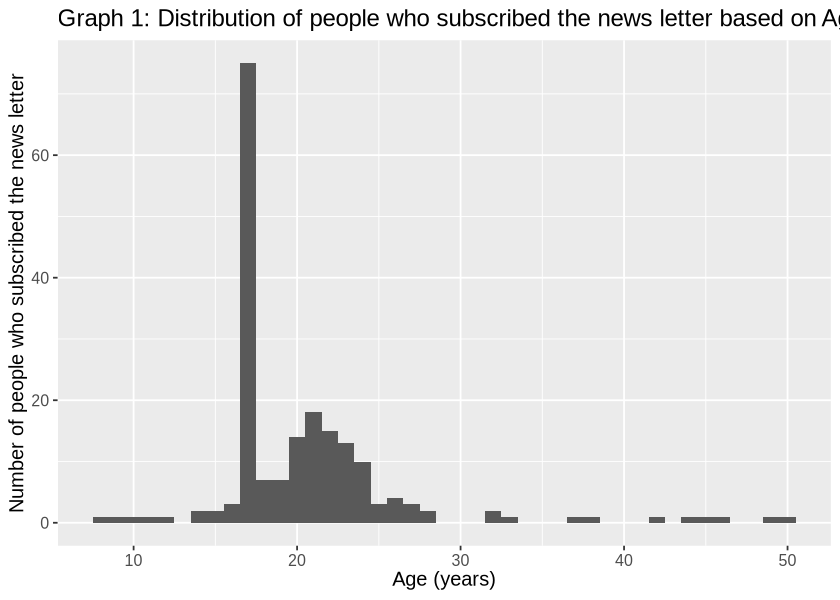

In [29]:
#Before making graphs with colours, we want to start from very basic graph to see if there is any trend.

#First, we want to see if the relationship between age and subscribe.
options(repr.plot.width= 7, repr.plot.height= 5)

subscribed_age <- players |>
                    filter(subscribe= TRUE) |>
                    select(Age)

subscirbe_age_plot <- ggplot(subscribed_age, aes(x=Age)) +
                        geom_histogram(binwidth=1) +
                        labs(x="Age (years)", y= "Number of people who subscribed the news letter", 
                             title= "Graph 1: Distribution of people who subscribed the news letter based on Age") +
                        theme(text=element_text(size=12))

head(subscribed_age)
subscirbe_age_plot

In [ ]:


options(repr.plot.width=10, repr.plot.height=7)

subscribe_age_colour_plot <- ggplot(players_select, aes(x= Age, fill= subscribe)) +
                        geom_histogram(stat="count", position= "dodge", bins=30) +
                        labs(x="Age (years)", y= "Count", 
                             title= "Graph 2: Distribution of players based on age and whether they subscribed the news letter or not.",
                             fill="Did player subscribed the news letter?")+
                        theme(text=element_text(size=12))

subscribe_age_colour_plot

**Table 6**

played_hours
1 30.3        
2  3.8        
3  0.0        
4  0.7        
5  0.1        
6  0.0

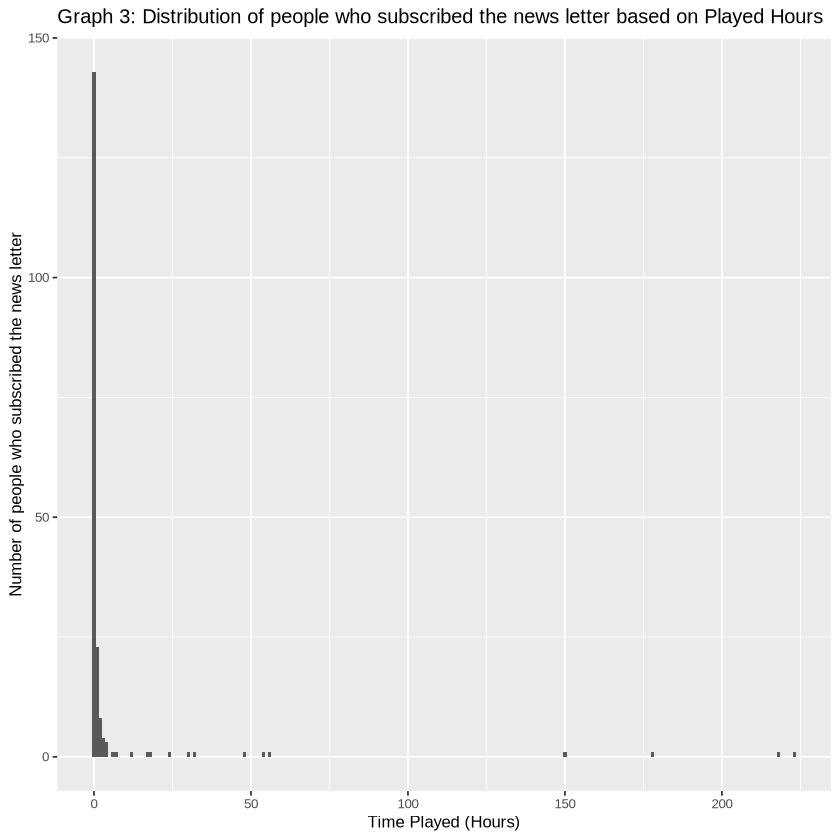

In [31]:
# Second, I want to see if the relationship between played_hours and subscribe.
options(repr.plot.width=7, repr.plot.height=7)

subscribed_hours <- players |>
                    filter(subscribe= TRUE) |>
                    select(played_hours)

subscirbe_hours_plot <- ggplot(subscribed_hours, aes(x=played_hours)) +
                        geom_histogram(binwidth=1) +
                        labs(x="Time Played (Hours)", y= "Number of people who subscribed the news letter", 
                             title= "Graph 3: Distribution of people who subscribed the news letter based on Played Hours") +
                        theme(text=element_text(size=10))

head(subscribed_hours)
subscirbe_hours_plot

Warning message in geom_histogram(stat = "count", position = "dodge", bins = 30, :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”
Warning message:
“Removed 85 rows containing non-finite outside the scale range (`stat_count()`).”


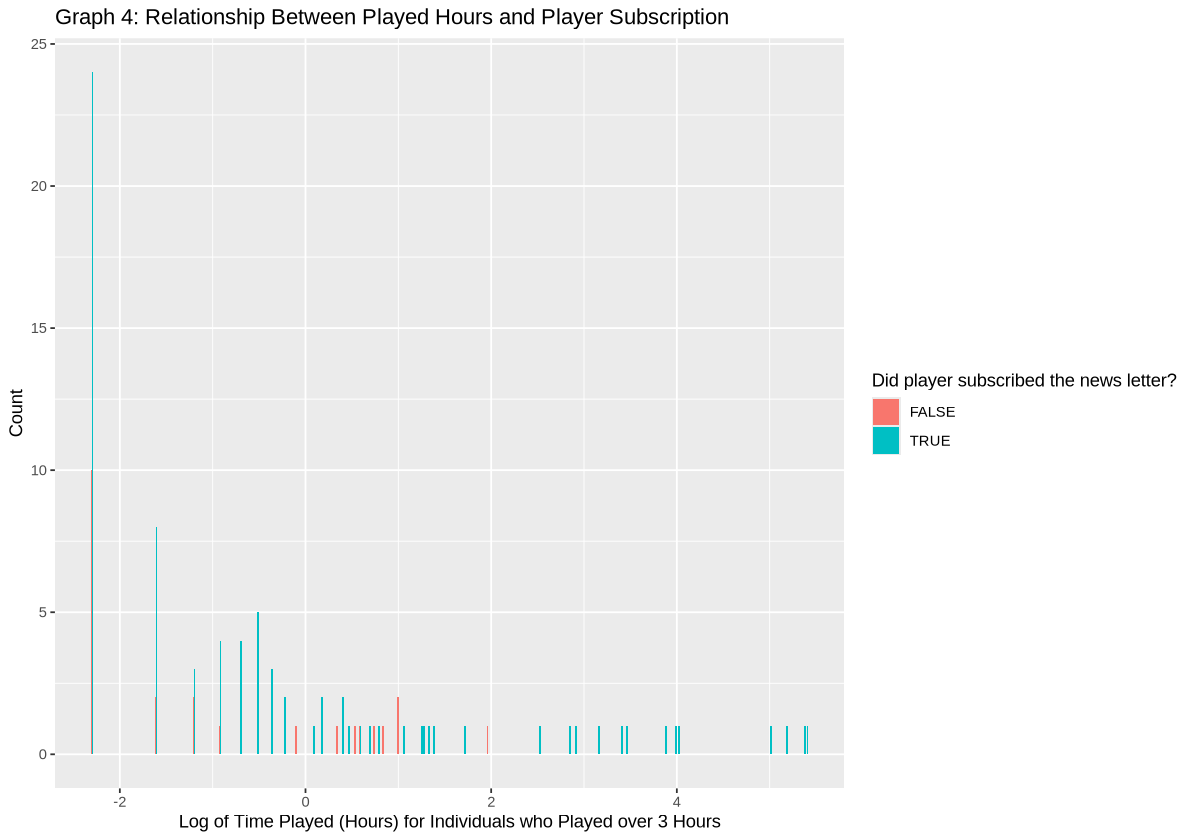

In [34]:
options(repr.plot.width=10, repr.plot.height=7)

played_hours_large_plot <- players|>
                        mutate(played_hours_log = log(played_hours))|>
                        ggplot(aes(x=played_hours_log, fill=subscribe))+
                        geom_histogram( stat="count", position= "dodge", bins=30, binwidth=10)+
                        labs(x="Log of Time Played (Hours) for Individuals who Played over 3 Hours",
                             y="Count",
                             fill="Did player subscribed the news letter?",
                            title="Graph 4: Relationship Between Played Hours and Player Subscription")
played_hours_large_plot

**Tables 7 and 8**

subscribe played_hours Age
1 FALSE     0.0          17 
2  TRUE     0.7          21 
3  TRUE     0.1          21 
4  TRUE     0.0          17 
5  TRUE     0.0          19 
6 FALSE     0.0          21

subscribe played_hours Age
1 TRUE       30.3         9 
2 TRUE        3.8        17 
3 TRUE       48.4        17 
4 TRUE        5.6        17 
5 TRUE       12.5        27 
6 TRUE      218.1        20

Warning message in geom_histogram(stat = "count", position = "dodge", binwidth = 10):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”
Warning message in geom_histogram(stat = "count", position = "dodge", binwidth = 10):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


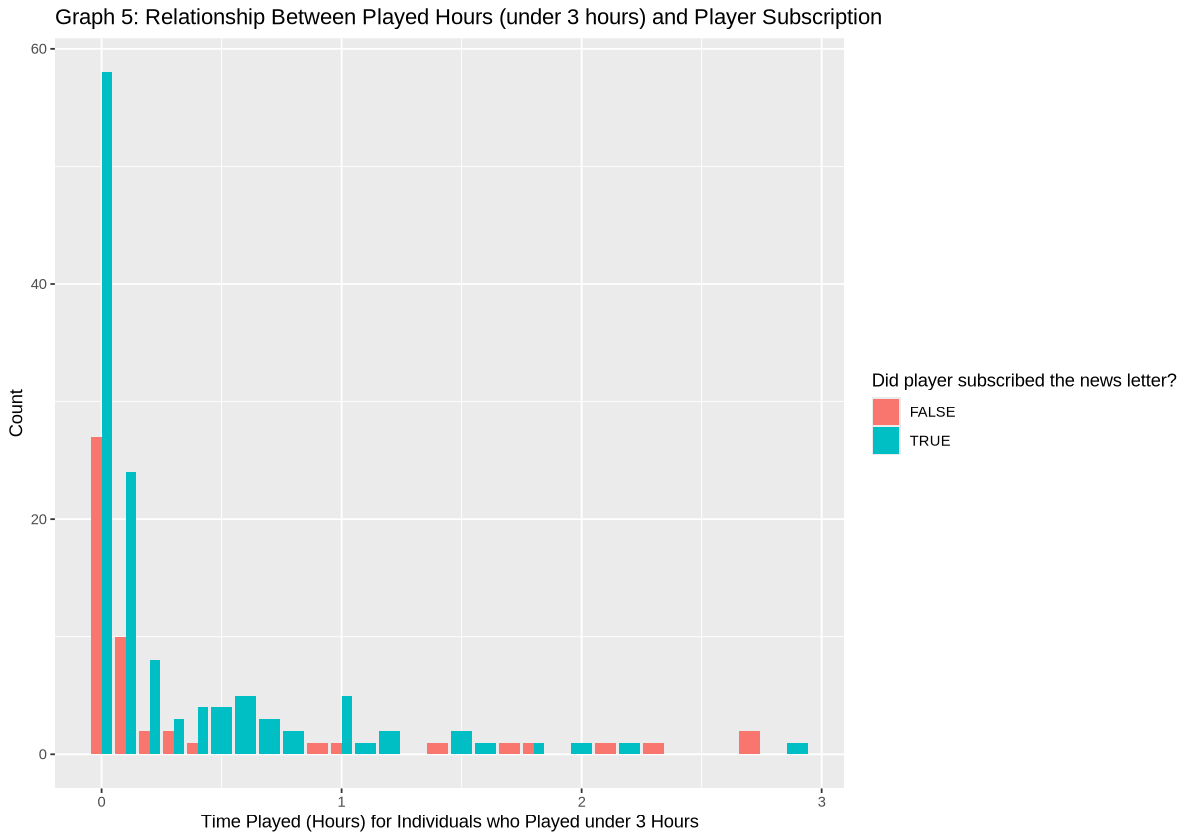

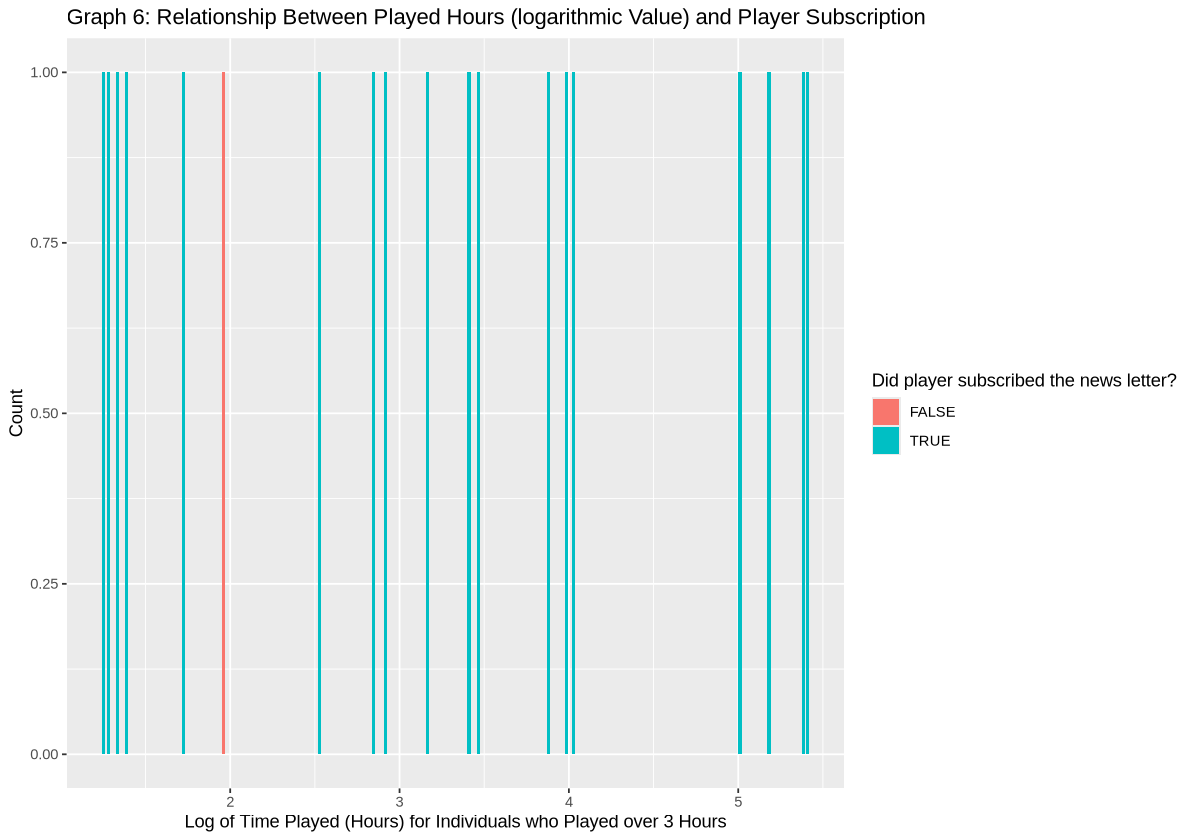

In [50]:
options(repr.plot.width=10, repr.plot.height=7)

players_separate_1 <- players_select |>
                        filter(played_hours <= 3)
players_separate_2 <- players_select |>
                        filter(played_hours >=3)

head(players_separate_1)
head(players_separate_2)

played_hours_small_plot <- players_separate_1|>
                        ggplot(aes(x=played_hours, fill=subscribe))+
                        geom_histogram( stat="count", position= "dodge", binwidth=10)+
                        labs(x="Time Played (Hours) for Individuals who Played under 3 Hours",
                             y="Count",
                             fill="Did player subscribed the news letter?",
                            title= "Graph 5: Relationship Between Played Hours (under 3 hours) and Player Subscription")
played_hours_small_plot

played_hours_large_plot <- players_separate_2|>
                        mutate(played_hours_log = log(played_hours))|>
                        ggplot(aes(x=played_hours_log, fill=subscribe))+
                        geom_histogram( stat="count", position= "dodge", binwidth=10)+
                        labs(x="Log of Time Played (Hours) for Individuals who Played over 3 Hours",
                             y="Count",
                             fill="Did player subscribed the news letter?", 
                            title= "Graph 6: Relationship Between Played Hours (logarithmic Value) and Player Subscription")
played_hours_large_plot

**Discussion**
We can see that if someone has played over 3 hours, they are very likely to have subscribed to the newsletter. However, if they have played under 3 hours, the time played is not enough to predict whether someone has subscribed to the newsletter or not. For this, we will have to use age to predict. 

From this analysis, we can see that if someone is under the age of 30 and played under 3 hours they are more likely to subscribe. 

*Are we doing classification analysis still?*

In [60]:
players_fct <- players_select |>
    mutate(subscribe = as_factor(subscribe))|>
    filter(Age!="NA")

In [61]:
set.seed(1234)
players_split <- initial_split(players_fct, prop=0.75, strata=subscribe)
training_set <- training(players_split)
testing_set <- testing(players_split)

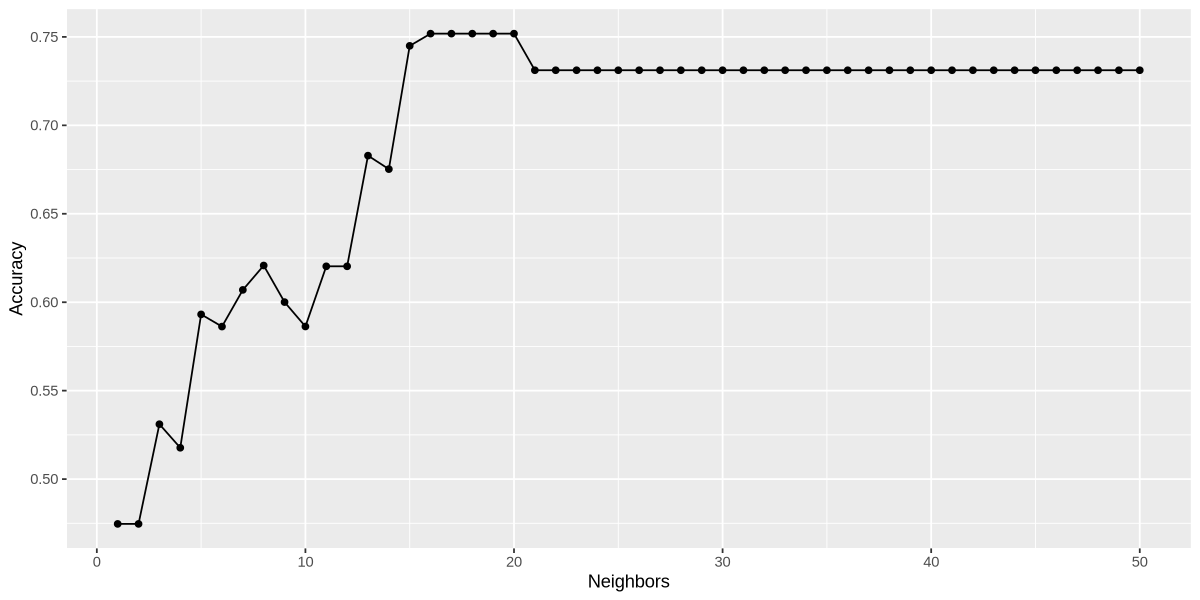

In [67]:
#knn classification using age and played_hours


options(repr.plot.height = 5, repr.plot.width = 10)
knn_recipe<-recipe(subscribe~ Age + played_hours, data=training_set)|>
    step_scale(all_predictors())|>
    step_center(all_predictors())

knn_spec<-nearest_neighbor(weight_func="rectangular", neighbors=tune())|>
    set_mode("classification")|>
    set_engine("kknn")

cross_vfold <- vfold_cv(training_set, v=5, strata=subscribe)

cross_k <- tibble(neighbors = seq(from=1, to=50, by=1))

knn_fit <- workflow()|>
    add_recipe(knn_recipe)|>
    add_model(knn_spec)|>
    tune_grid(resamples=cross_vfold, grid=cross_k)|>
    collect_metrics()

accuracies <- knn_fit|>
                filter(.metric=="accuracy")

cross_val_plot <- ggplot(accuracies, aes(x=neighbors, y=mean))+
                  geom_point()+
                  geom_line()+
                  labs(x="Neighbors", y="Accuracy")

cross_val_plot

**Discussion**

From this analyis, we can determine that we should use k=5 to determine whether someone is subscribed or not.

**Table 9**

In [14]:
players_spec <- nearest_neighbor(weight_func="rectangular", neighbors=5)|>
    set_engine("kknn")|>
    set_mode("classification") 

players_fit <- workflow()|>
    add_recipe(knn_recipe)|>
    add_model(players_spec)|>
    fit(data=players_fct)

players_predictions <- predict(players_fit, testing_set)|>
    bind_cols(testing_set)|>
    rename(pred_subscribe = .pred_class)

head(players_predictions)

pred_subscribe subscribe played_hours Age
1 TRUE           TRUE      30.3          9 
2 TRUE           FALSE      0.0         17 
3 TRUE           TRUE       0.1         21 
4 TRUE           TRUE       0.0         17 
5 FALSE          TRUE       0.2         22 
6 TRUE           TRUE       0.0         17

In [15]:
set.seed(9999) 
players_metrics <- players_predictions|>
    metrics(truth=subscribe, estimate=pred_subscribe)|>
    filter(.metric=="accuracy")

players_conf_mat <- players_predictions|>
    conf_mat(truth=subscribe, estimate=pred_subscribe)

players_conf_mat

          Truth
Prediction FALSE TRUE
     FALSE     6    4
     TRUE      7   32

In [16]:
are_grid <- seq(min(players_fct$played_hours),
                max(players_fct$played_hours),
                length.out = 100)
smo_grid <- seq(min(players_fct$Age),
                max(players_fct$Age),
                length.out = 100)
asgrid <- as_tibble(expand.grid(played_hours = are_grid,
                                Age = smo_grid))

knnPredGrid <- predict(players_fit, asgrid)

prediction_table <- bind_cols(knnPredGrid, asgrid) |>
  rename(subscribe = .pred_class)

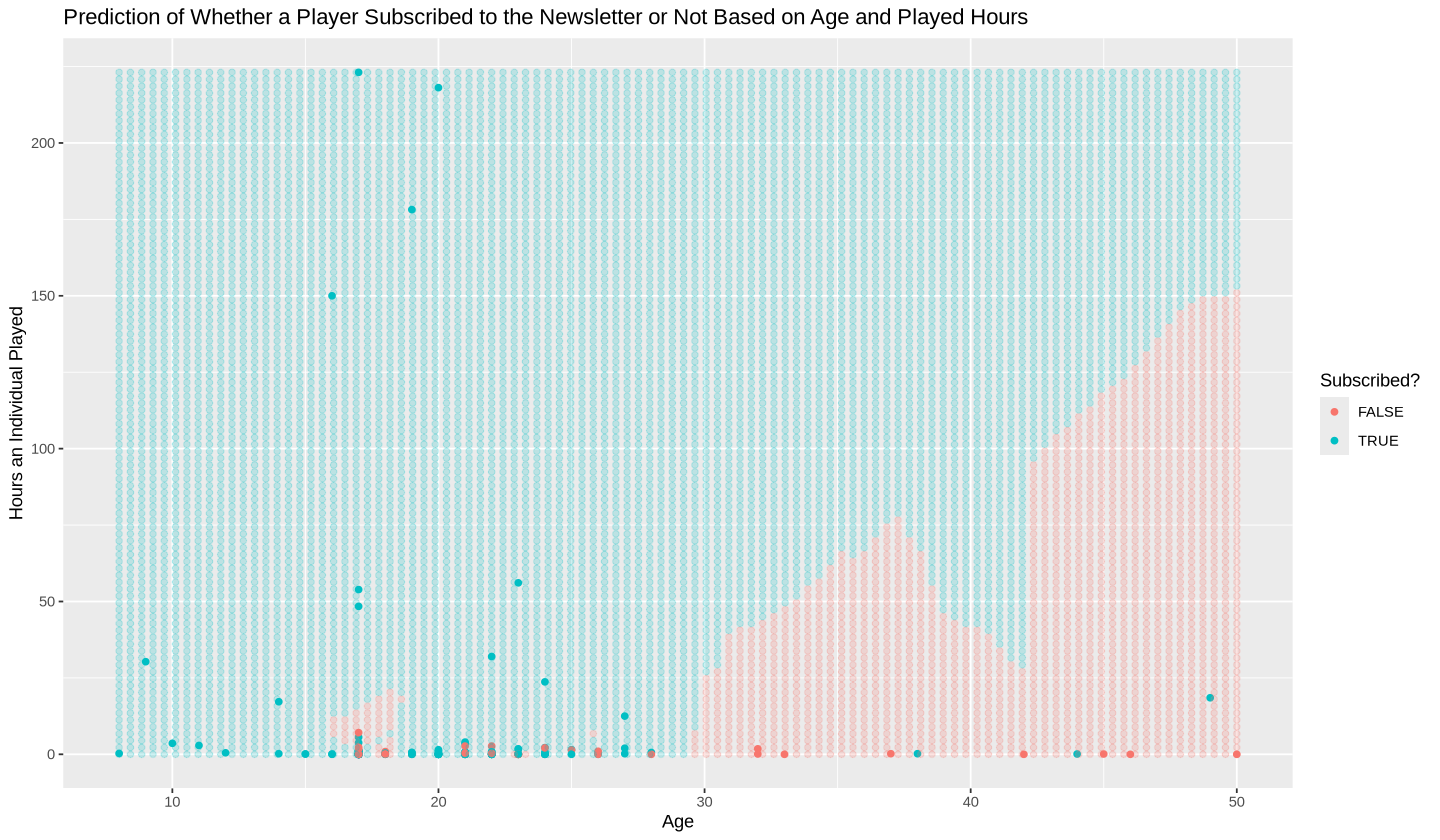

In [17]:
options(repr.plot.width=12, repr.plot.height=7)
prediction_plot <- ggplot()+
                geom_point(players_fct, mapping=aes(x = Age,
                           y =played_hours,
                           color = subscribe), alpha = 1) +
                geom_point(prediction_table, mapping=aes(x = Age,
                           y =played_hours,
                           color = subscribe), alpha = 0.2)+
                labs(x="Age", y="Hours an Individual Played", title="Prediction of Whether a Player Subscribed to the Newsletter or Not Based on Age and Played Hours", colour="Subscribed?")
prediction_plot

**Table 10**

In [18]:
#Check precision and recall on testing set

data_test_predictions <- predict(players_fit, testing_set) |>
                         bind_cols(testing_set)

data_test_precisions <- data_test_predictions|>
                        precision(truth= subscribe, estimate= .pred_class, event_level="first")

data_test_recall <- data_test_predictions|>
                        recall(truth= subscribe, estimate= .pred_class, event_level="first")

data_test_precisions 
data_test_recall

.metric   .estimator .estimate
1 precision binary     0.6

.metric .estimator .estimate
1 recall  binary     0.4615385

### Classification with k=8

**Tables 11 and 12**

In [19]:
players_spec <- nearest_neighbor(weight_func="rectangular", neighbors=8)|>
    set_engine("kknn")|>
    set_mode("classification") 

players_fit <- workflow()|>
    add_recipe(knn_recipe)|>
    add_model(players_spec)|>
    fit(data=players_fct)

players_predictions <- predict(players_fit, testing_set)|>
    bind_cols(testing_set)|>
    rename(pred_subscribe = .pred_class)

head(players_predictions)


data_test_predictions <- predict(players_fit, testing_set) |>
                         bind_cols(testing_set)

data_test_precisions <- data_test_predictions|>
                        precision(truth= subscribe, estimate= .pred_class, event_level="first")

data_test_recall <- data_test_predictions|>
                        recall(truth= subscribe, estimate= .pred_class, event_level="first")

data_test_precisions 
data_test_recall

pred_subscribe subscribe played_hours Age
1 TRUE           TRUE      30.3          9 
2 TRUE           FALSE      0.0         17 
3 TRUE           TRUE       0.1         21 
4 TRUE           TRUE       0.0         17 
5 TRUE           TRUE       0.2         22 
6 TRUE           TRUE       0.0         17

.metric   .estimator .estimate
1 precision binary     0.75

.metric .estimator .estimate
1 recall  binary     0.4615385

In [20]:
are_grid <- seq(min(players_fct$played_hours),
                max(players_fct$played_hours),
                length.out = 100)
smo_grid <- seq(min(players_fct$Age),
                max(players_fct$Age),
                length.out = 100)
asgrid <- as_tibble(expand.grid(played_hours = are_grid,
                                Age = smo_grid))

knnPredGrid <- predict(players_fit, asgrid)

prediction_table <- bind_cols(knnPredGrid, asgrid) |>
  rename(subscribe = .pred_class)

### Classificaiton with a single predictor (Age)

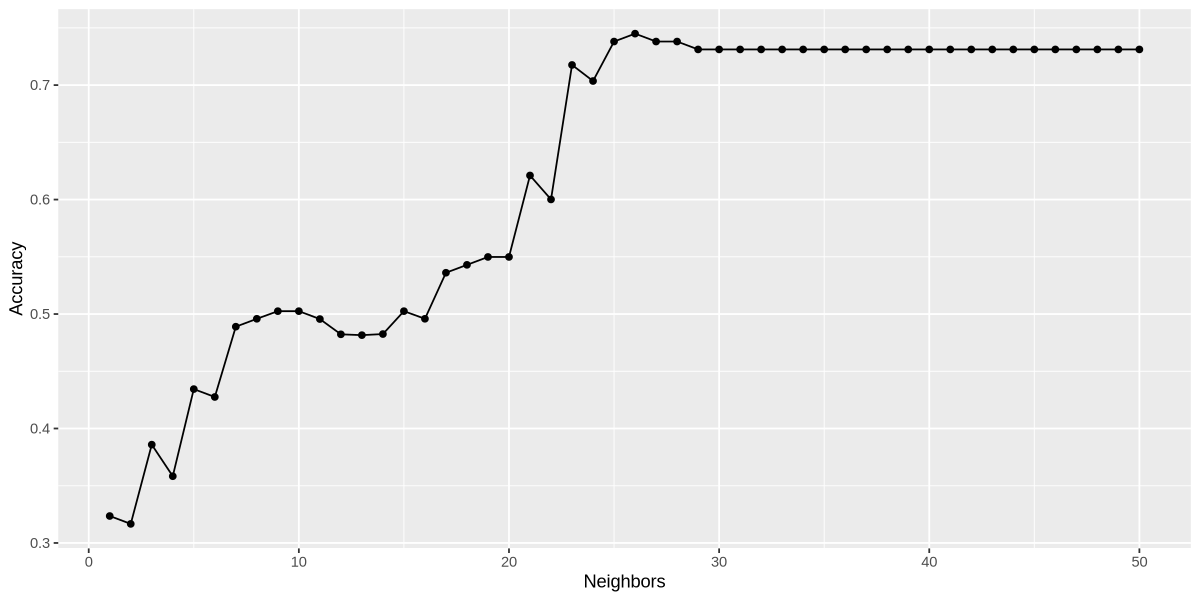

In [25]:
options(repr.plot.height = 5, repr.plot.width = 10)

knn_recipe2<-recipe(subscribe~ Age, data=training_set)|>
    step_scale(all_predictors())|>
    step_center(all_predictors())

knn_fit2<- workflow()|>
    add_recipe(knn_recipe2)|>
    add_model(knn_spec)|>
    tune_grid(resamples=cross_vfold, grid=cross_k)|>
    collect_metrics()

accuracies2 <- knn_fit2|>
                filter(.metric=="accuracy")

cross_val_plot2 <- ggplot(accuracies2, aes(x=neighbors, y=mean))+
                  geom_point()+
                  geom_line()+
                  labs(x="Neighbors", y="Accuracy")

cross_val_plot2

In [ ]:
players_spec <- nearest_neighbor(weight_func="rectangular", neighbors=7)|>
    set_engine("kknn")|>
    set_mode("classification") 

players_fit2 <- workflow()|>
    add_recipe(knn_recipe2)|>
    add_model(players_spec)|>
    fit(data=players_fct)

players_predictions <- predict(players_fit, testing_set)|>
    bind_cols(testing_set)|>
    rename(pred_subscribe = .pred_class)

head(players_predictions)

In [ ]:
data_test_predictions2 <- predict(players_fit2, testing_set) |>
                         bind_cols(testing_set)

data_test_precisions2 <- data_test_predictions2|>
                        precision(truth= subscribe, estimate= .pred_class, event_level="first")

data_test_recall2 <- data_test_predictions2|>
                        recall(truth= subscribe, estimate= .pred_class, event_level="first")

data_test_precisions2
data_test_recall2

From this, we found that single variable predictor (i.e. removing the played hours from predictors) did not improve the precision or recall of the classification.

## References: 
Timbers, T., Campbell, T., & Lee, M. (2024, August 21). Data science: A first introduction. Retrieved April 5, 2025, from https://datasciencebook.ca/
